In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

import pandas as pd
import numpy as np
from scipy.spatial.distance import euclidean, cityblock, cosine
import sklearn.metrics.pairwise
import seaborn as sns
import folium
# Import matplotlib for 3d plotting:
import matplotlib.pyplot as plt
from sklearn.preprocessing import  MinMaxScaler
from matplotlib import offsetbox
# Make matplotlib work in jupyter notebook
%matplotlib inline

In [2]:
def plot_points(df,color="red",title=""):

    X=df['lon']
    Y=df['lat']

    annotations=df.index

    plt.figure(figsize=(8,6))
    plt.scatter(X,Y,s=100,color=color)
    plt.title(title)
    plt.xlabel("lat")
    plt.ylabel("log")
    for i, label in enumerate(annotations):
        plt.annotate(label, (X.iloc[i], Y.iloc[i]))
    plt.axis('equal')
    plt.show()

In [3]:
def plot_embedding(X, title, ax):
    X = MinMaxScaler().fit_transform(X)
    for digit in digits.target_names:
        ax.scatter(
            *X[y == digit].T,
            marker=f"${digit}$",
            s=60,
            color=plt.cm.Dark2(digit),
            alpha=0.425,
            zorder=2,
        )
    shown_images = np.array([[1.0, 1.0]])  # just something big
    for i in range(X.shape[0]):
        # plot every digit on the embedding
        # show an annotation box for a group of digits
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 4e-3:
            # don't show points that are too close
            continue
        shown_images = np.concatenate([shown_images, [X[i]]], axis=0)
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i]
        )
        imagebox.set(zorder=1)
        ax.add_artist(imagebox)

    ax.set_title(title)
    ax.axis("off")

In [4]:
distance=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/distance.csv').set_index('name')
distance.head(8)

,Buenos Aires,Paris,Melbourne,St Petersbourg,Abidjan,Montreal,Nairobi,Salvador
name,,,,,,,,
Buenos Aires,0.00,83.00,4.00,93.93,39.33,79.52,32.71,21.03
Paris,83.00,0.00,87.00,10.93,43.67,3.48,50.29,61.97
Melbourne,4.00,87.00,0.00,97.93,43.33,83.52,36.71,25.03
St Petersbourg,93.93,10.93,97.93,0.00,54.60,14.41,61.22,72.90
Abidjan,39.33,43.67,43.33,54.60,0.00,40.19,6.62,18.30
Montreal,79.52,3.48,83.52,14.41,40.19,0.00,46.81,58.49
Nairobi,32.71,50.29,36.71,61.22,6.62,46.81,0.00,11.68
Salvador,21.03,61.97,25.03,72.90,18.30,58.49,11.68,0.00


In [5]:
from sklearn.manifold import MDS


In [6]:
embedding = MDS(dissimilarity='precomputed', n_components=2, random_state=0,
                 max_iter=300, eps=1e-3)

In [14]:
X_transformed = embedding.fit_transform(distance)
X_transformed

array([[-11.18630004, -41.80256455],
       [  9.5136384 ,  38.73201664],
       [ -9.2923592 , -46.08804169],
       [ 16.54916736,  47.74663293],
       [ -1.60844493,  -3.57521947],
       [  7.3287376 ,  35.79475057],
       [ -3.00161566, -10.07223994],
       [ -8.30282353, -20.7353345 ]])

In [8]:
df_t=pd.DataFrame(X_transformed , columns=["lon","lat"], index=distance.columns)
df_t.head(8)

,lon,lat
Buenos Aires,-11.186300,-41.802565
Paris,9.513638,38.732017
Melbourne,-9.292359,-46.088042
St Petersbourg,16.549167,47.746633
Abidjan,-1.608445,-3.575219
Montreal,7.328738,35.794751
Nairobi,-3.001616,-10.072240
Salvador,-8.302824,-20.735334


In [9]:
embedding.embedding_


array([[-11.18630004, -41.80256455],
       [  9.5136384 ,  38.73201664],
       [ -9.2923592 , -46.08804169],
       [ 16.54916736,  47.74663293],
       [ -1.60844493,  -3.57521947],
       [  7.3287376 ,  35.79475057],
       [ -3.00161566, -10.07223994],
       [ -8.30282353, -20.7353345 ]])

In [10]:
embedding.stress_


2.4172408009684325

In [11]:
embedding.dissimilarity_matrix_


array([[ 0.  , 83.  ,  4.  , 93.93, 39.33, 79.52, 32.71, 21.03],
       [83.  ,  0.  , 87.  , 10.93, 43.67,  3.48, 50.29, 61.97],
       [ 4.  , 87.  ,  0.  , 97.93, 43.33, 83.52, 36.71, 25.03],
       [93.93, 10.93, 97.93,  0.  , 54.6 , 14.41, 61.22, 72.9 ],
       [39.33, 43.67, 43.33, 54.6 ,  0.  , 40.19,  6.62, 18.3 ],
       [79.52,  3.48, 83.52, 14.41, 40.19,  0.  , 46.81, 58.49],
       [32.71, 50.29, 36.71, 61.22,  6.62, 46.81,  0.  , 11.68],
       [21.03, 61.97, 25.03, 72.9 , 18.3 , 58.49, 11.68,  0.  ]])

In [12]:
# Make a data frame with dots to show on the map
df = pd.DataFrame({
   'lon':[-58, 2, 145, 30.32, -4.03, -73.57, 36.82, -38.5],
   'lat':[-34, 49, -38, 59.93, 5.33, 45.52, -1.29, -12.97],
   'name':['Buenos Aires', 'Paris', 'Melbourne', 'St Petersbourg', 'Abidjan', 'Montreal', 'Nairobi', 'Salvador']})
df=df.set_index('name')
df.head(10)

,lon,lat
name,,
Buenos Aires,-58.00,-34.00
Paris,2.00,49.00
Melbourne,145.00,-38.00
St Petersbourg,30.32,59.93
Abidjan,-4.03,5.33
Montreal,-73.57,45.52
Nairobi,36.82,-1.29
Salvador,-38.50,-12.97


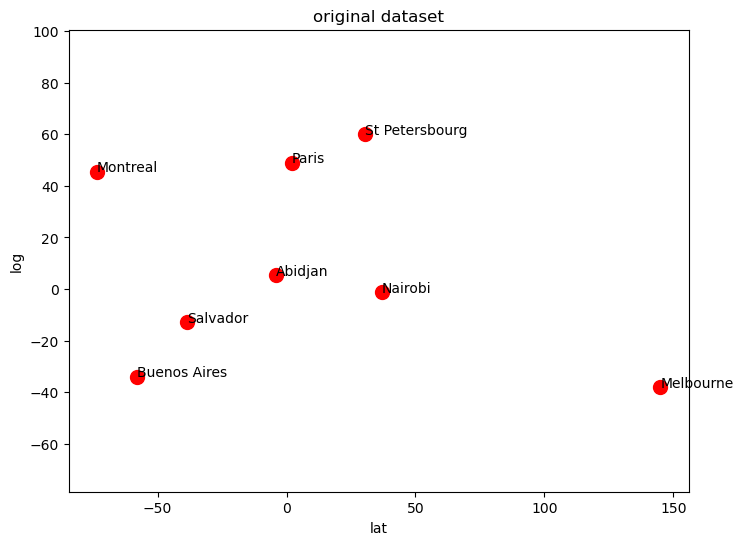

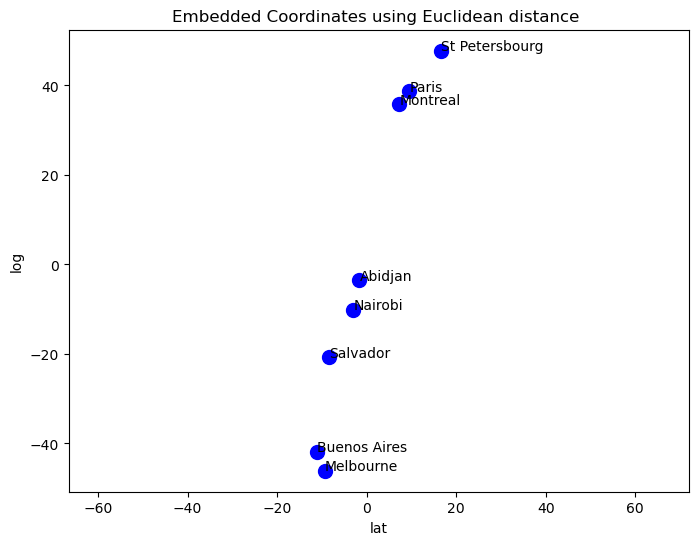

In [13]:
plot_points(df,title='original dataset')

plot_points(df_t,color='blue',title='Embedded Coordinates using Euclidean distance ')

In [15]:
from scipy.spatial.distance import squareform, pdist

In [16]:
distance = pd.DataFrame(squareform(pdist(df.iloc[:,1:])), columns=df.index, index=df.index)